In [1]:
import pandas as pd
import pickle
import seaborn as sns

# Necessary imports
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
from statsmodels.multivariate.pca import PCA
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
def diagnostic_plot(x, y):
    plt.figure(figsize=(20,5))
    
    rgr = LinearRegression()
    rgr.fit(x,y)
    pred = rgr.predict(x)

    plt.subplot(1, 3, 1)
    plt.scatter(x,y)
    plt.plot(x, pred, color='blue',linewidth=1)
    plt.title("Regression fit")
    plt.xlabel("x")
    plt.ylabel("y")
    
    plt.subplot(1, 3, 2)
    res = y - pred
    plt.scatter(pred, res)
    plt.title("Residual plot")
    plt.xlabel("prediction")
    plt.ylabel("residuals")
    
    plt.subplot(1, 3, 3)
    #Generates a probability plot of sample data against the quantiles of a 
    # specified theoretical distribution 
    stats.probplot(res, dist="norm", plot=plt)
    plt.title("Normal Q-Q plot")

In [3]:
new_era = pickle.load(open('ready_for_model_new_era.p','rb'))
new_era['new_era'] = 1
new_era['old_era'] = 0

In [4]:
new_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,new_era,old_era
160,121.0,112.0,111.0,108.0,96.0,109.0,108.0,106.0,105.0,104.0,0.658537,2014,1,0
58,126.0,120.0,114.0,110.0,107.0,110.0,107.0,106.0,105.0,101.0,0.792683,2018,1,0
12,113.0,112.0,112.0,112.0,111.0,114.0,113.0,112.0,111.0,111.0,0.475610,2019,1,0
141,126.0,126.0,118.0,113.0,108.0,111.0,107.0,106.0,105.0,98.0,0.682927,2015,1,0
44,116.0,110.0,105.0,103.0,103.0,114.0,113.0,113.0,109.0,106.0,0.304878,2018,1,0


In [5]:
old_era = pickle.load(open('ready_for_model_old_era.p','rb'))
old_era['old_era'] = 1
old_era['new_era'] = 0

In [6]:
old_era.sample(5)

,ORtg_p1,ORtg_p2,ORtg_p3,ORtg_p4,ORtg_p5,DRtg_p1,DRtg_p2,DRtg_p3,DRtg_p4,DRtg_p5,win_per,year,old_era,new_era
23,117.0,114.0,113.0,110.0,105.0,106,105,104,101,100,0.743902,1998,1,0
88,119.0,111.0,107.0,106.0,106.0,107,106,105,102,98,0.670732,1995,1,0
37,121.0,109.0,105.0,105.0,103.0,108,106,104,103,103,0.475610,1997,1,0
118,120.0,111.0,111.0,111.0,107.0,112,109,106,106,102,0.609756,1994,1,0
112,119.0,114.0,112.0,102.0,100.0,114,114,113,110,109,0.317073,1995,1,0


In [7]:
combined_data = pd.concat([new_era,old_era])

/Users/williamyee/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


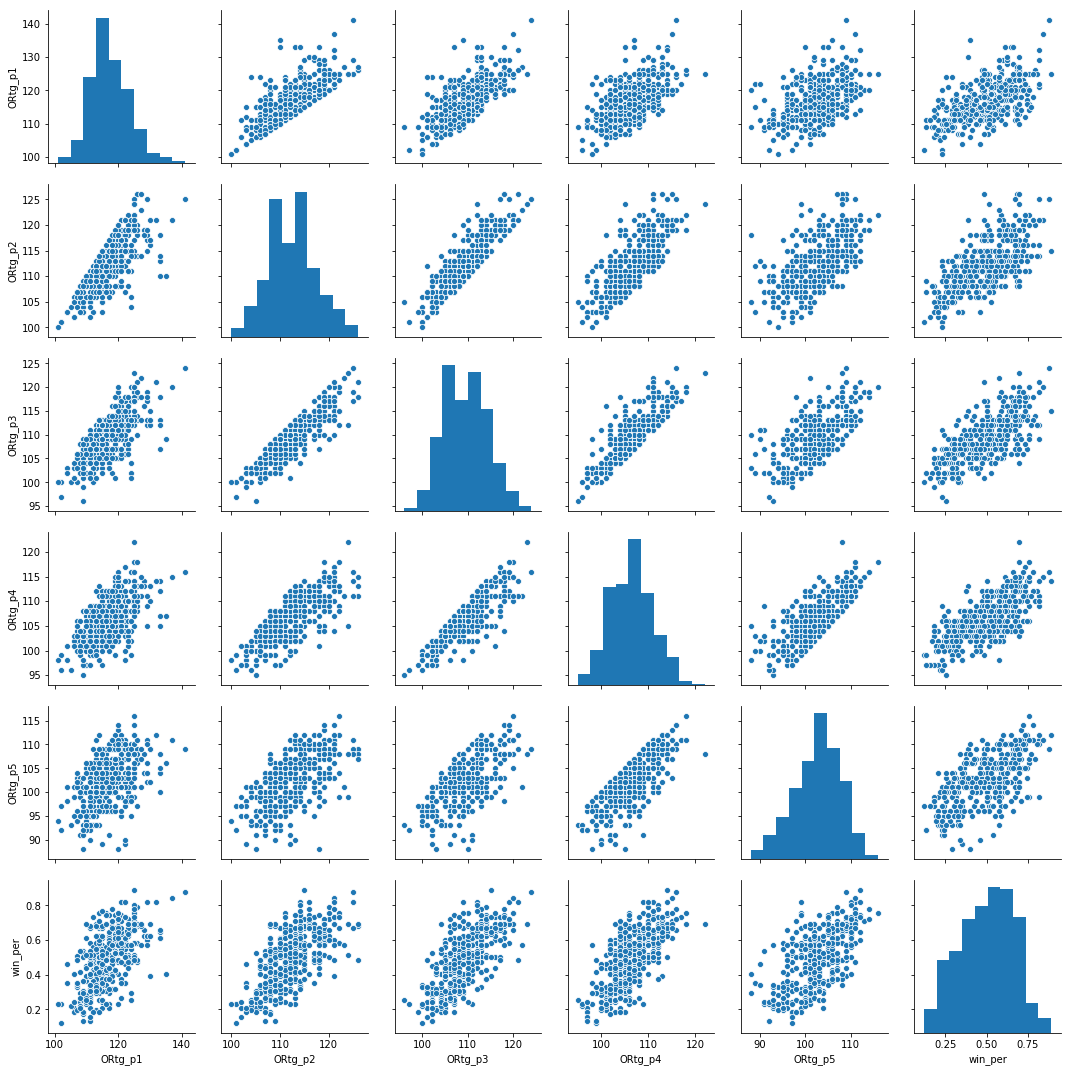

In [8]:
sns.pairplot(combined_data.loc[:,['ORtg_p1', 'ORtg_p2','ORtg_p3','ORtg_p4','ORtg_p5','win_per']]);

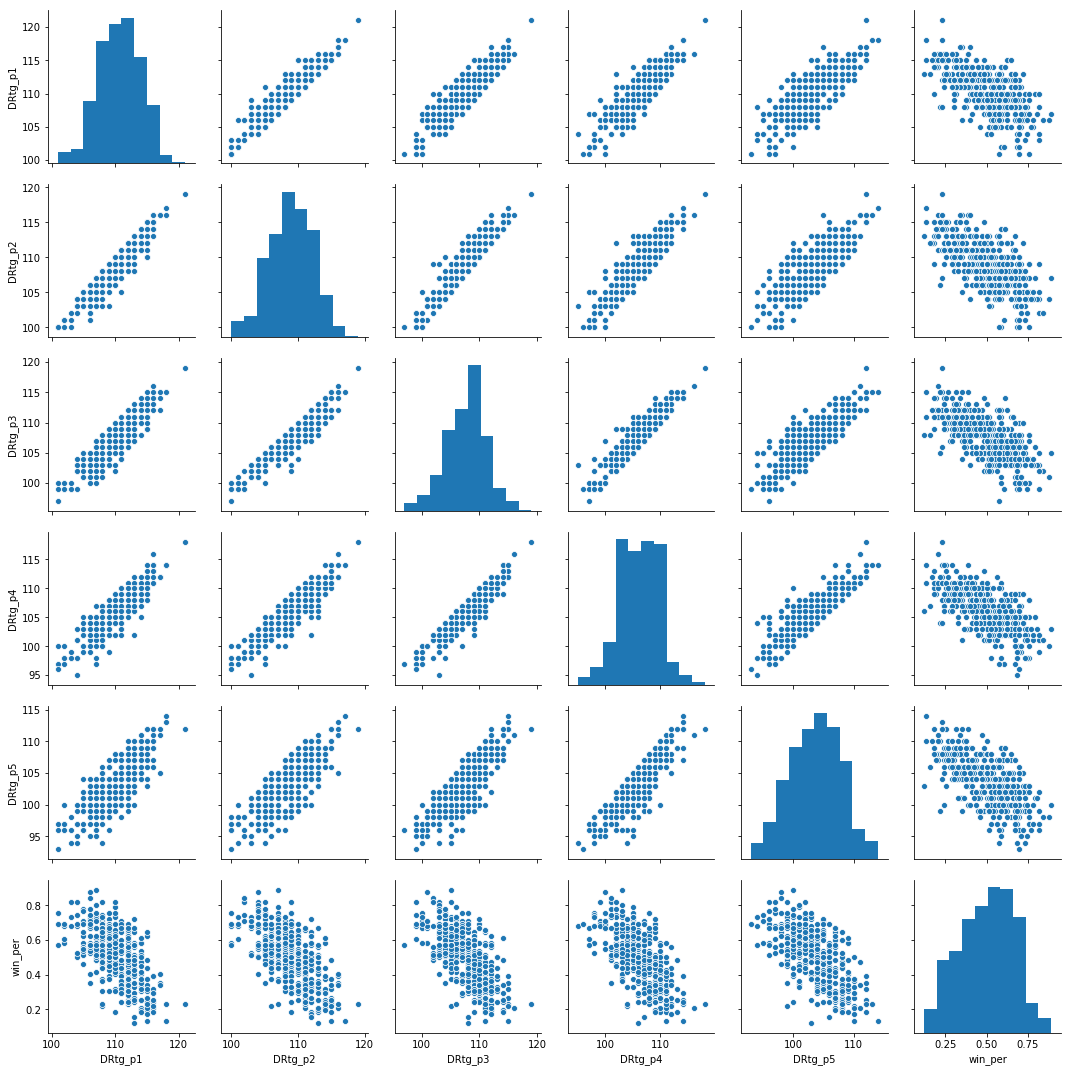

In [9]:
sns.pairplot(combined_data.loc[:,['DRtg_p1', 'DRtg_p2','DRtg_p3','DRtg_p4','DRtg_p5','win_per']]);

In [10]:
# Create your feature matrix (X) and target vector (y)
y, X = patsy.dmatrices('win_per ~ ORtg_p1 + ORtg_p2+ ORtg_p3+ ORtg_p4+ ORtg_p5 + DRtg_p1 + DRtg_p2+ DRtg_p3+ DRtg_p4+ DRtg_p5 + new_era + old_era', data=combined_data, return_type="dataframe")



# Create your model
model = sm.OLS(y, X)

# Fit your model to your training set
fit = model.fit()

# Print summary statistics of the model's performance
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                win_per   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     217.5
Date:                Fri, 12 Apr 2019   Prob (F-statistic):          1.56e-159
Time:                        12:43:17   Log-Likelihood:                 561.71
No. Observations:                 405   AIC:                            -1099.
Df Residuals:                     393   BIC:                            -1051.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5220      0.093      5.617      0.000       0.339       0.705
ORtg_p1        0.0033      0.001      4.161      0.000       0.002       0.005
ORtg_p2        0.0061      0.001      4.229      0.000       0.003       0.009
ORtg_p3        0.0039      0.002      2.306      0.022       0.001       0.007
ORtg_p4        0.0064      0.001      4.268      0.000       0.003       0.009
ORtg_p5        0.0042      0.001      4.474      0.000       0.002       0.006
DRtg_p1       -0.0067      0.003     -2.419      0.016      -0.012      -0.001
DRtg_p2       -0.0099      0.003     -2.891      0.004      -0.017      -0.003
DRtg_p3        0.0001      0.003      0.037      0.971      -0.006       0.006
DRtg_p4       -0.0046      0.003     -1.769      0.078      -0.010       0.001
DRtg_p5       -0.0055      0.002     -3.545      0.000      -0.009      -0.002
new_era        0.2693      0.047      5.777      0.000       0.178       0.361
old_era        0.2527      0.047      5.431      0.000       0.161       0.344
==============================================================================
Omnibus:                        1.429   Durbin-Watson:                   2.099
Prob(Omnibus):                  0.489   Jarque-Bera (JB):                1.417
Skew:                           0.068   Prob(JB):                        0.493
Kurtosis:                       2.745   Cond. No.                     7.77e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 7.89e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

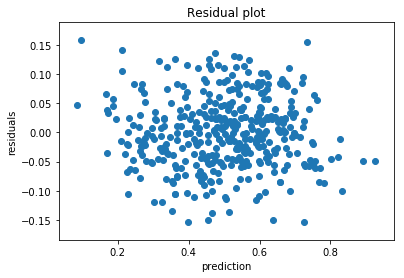

In [11]:
pred = fit.predict(X)
res = y.iloc[:,0] - pred
plt.scatter(pred, res)
plt.title("Residual plot")
plt.xlabel("prediction")
plt.ylabel("residuals");
    


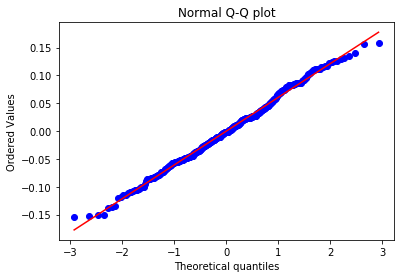

In [12]:
stats.probplot(res, dist="norm", plot=plt)
plt.title("Normal Q-Q plot");

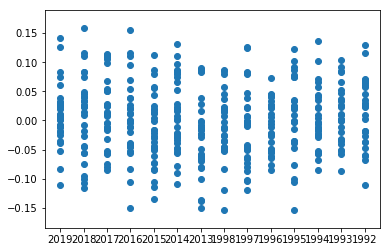

In [15]:
plt.scatter(y=res,x=combined_data['year']);

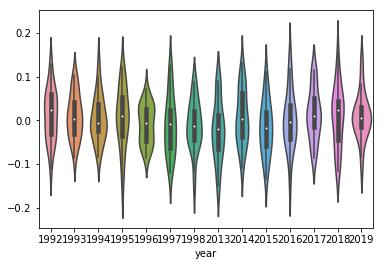

In [16]:
sns.violinplot(y=res,x=combined_data['year']);